In [7]:
import os
import re
import logging
import numpy as np
import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt
from pydub import AudioSegment


In [12]:
# load data
df = pd.read_csv('data/songs_wav.csv', sep=",")

df.head()

,title,nama_lagu,region,keyword,duration,url,path,wav_path
0,Bungong Jeumpa - Putri Ariani Cover (Lagu Daer...,Bungong Jeumpa,Aceh,Bungong Jeumpa asal Aceh,160,https://www.youtube.com/watch?v=RjI7W_XmzLM,datasets/songs/bungong_jeumpa_putri_ariani_cov...,datasets/wav_songs/bungong_jeumpa_putri_ariani...
1,Bungong Jeumpa | Lirik dan Terjemahan | Lagu D...,Bungong Jeumpa,Aceh,Bungong Jeumpa asal Aceh,243,https://www.youtube.com/watch?v=lAVi2OE2bRY,datasets/songs/bungong_jeumpa_lirik_dan_terjem...,datasets/wav_songs/bungong_jeumpa_lirik_dan_te...
2,Tari Bungong Jeumpa Aceh |Rumah Belajar Mawinsya,Bungong Jeumpa,Aceh,Bungong Jeumpa asal Aceh,210,https://www.youtube.com/watch?v=W3PRdCxocM0,datasets/songs/tari_bungong_jeumpa_aceh_rumah_...,datasets/wav_songs/tari_bungong_jeumpa_aceh_ru...
3,"TARI ""BUNGONG JEUMPA"" BERASAL DARI ACEH",Bungong Jeumpa,Aceh,Bungong Jeumpa asal Aceh,215,https://www.youtube.com/watch?v=3iToqU4LnPU,datasets/songs/tari_bungong_jeumpa_berasal_dar...,datasets/wav_songs/tari_bungong_jeumpa_berasal...
4,KAKA ALFARISI - BUNGONG JEUMPA (OFFICIAL VIDEO),Bungong Jeumpa,Aceh,Bungong Jeumpa asal Aceh,261,https://www.youtube.com/watch?v=N9JDR0ZH4AU,datasets/songs/kaka_alfarisi_bungong_jeumpa_of...,datasets/wav_songs/kaka_alfarisi_bungong_jeump...


In [13]:
  # Cek jika wav_path adalah string dan file yang valid
        # if isinstance(wav_path, str) and os.path.isfile(wav_path):
        #     norm_title = normalized_yt_title(nama_lagu)
        #     norm_region = region.lower().replace(' ', '_')
        #     output_dir = os.path.join(output_base_folder, norm_region, norm_title + "_" + str(index))
            
        #     audio = AudioSegment.from_wav(wav_path)
        #     total_duration = len(audio) / 1000  # Durasi dalam detik
        #     segment_duration = 30
        #     num_segments = int(total_duration // segment_duration)


        #     os.makedirs(output_dir, exist_ok=True)

        #     for i in range(num_segments):
        #         start_time = i * segment_duration * 1000
        #         end_time = (i + 1) * segment_duration * 1000
        #         segment = audio[start_time:end_time]
                
        #         segment_file = os.path.join(output_dir, f"segment{i + 1}.wav")
        #         segment.export(segment_file, format="wav")
                
        #         split_result.append({
        #             'title': nama_lagu,
        #             'region': region,
        #             'keyword': keyword,
        #             '30s_path': segment_file
        #         })
        #     print(f"Saved {num_segments} segments in {norm_region} for {title} at: {output_dir}")
        # else:
        #     print(f"Invalid wav_path at index {index}: {wav_path}")

In [29]:
def sanitize_filename(filename):
    """
    Removes or replaces invalid characters from a filename or folder name.
    """
    return re.sub(r'[<>:"/\\|?*]', '', filename)

def normalized_yt_title(title):
    text = title.lower()
    text = text.replace(' ', '_')
    text = re.sub(r'[^a-z0-9_]', '', text)
    text = re.sub(r'_{2,}', '_', text)
    
    return text

split_result = []

def split_songs_to_segments(df, output_base_folder='datasets/30s_segments'):
    for index, row in df.iterrows():
        wav_path = row['wav_path']
        nama_lagu = row['nama_lagu']
        
        os.makedirs(f"{output_base_folder}/{normalized_yt_title(nama_lagu)}", exist_ok=True)
        
        audio = AudioSegment.from_wav(wav_path)
        total_duration = len(audio) / 1000
        segment_duration = 30
        num_segments = int(total_duration // segment_duration)
        
        for i in range(num_segments):
            start_time = i * segment_duration * 1000 
            end_time = (i + 1) * segment_duration * 1000
            segment = audio[start_time:end_time]
            
            segment_file = f"{output_base_folder}/{normalized_yt_title(nama_lagu)}/segment_{index}_{i}.wav"
            segment.export(segment_file, format="wav")
            
            split_result.append({
                'title': nama_lagu,
                '30s_path': segment_file
            })
        print(f"Saved {num_segments} segments for {nama_lagu} at: {output_base_folder}/{normalized_yt_title(nama_lagu)}")
        

In [30]:
split_songs_to_segments(df)

Saved 5 segments for Bungong Jeumpa at: datasets/30s_segments/bungong_jeumpa
Saved 8 segments for Bungong Jeumpa at: datasets/30s_segments/bungong_jeumpa
Saved 6 segments for Bungong Jeumpa at: datasets/30s_segments/bungong_jeumpa
Saved 7 segments for Bungong Jeumpa at: datasets/30s_segments/bungong_jeumpa
Saved 8 segments for Bungong Jeumpa at: datasets/30s_segments/bungong_jeumpa
Saved 10 segments for Jambo – Jambo at: datasets/30s_segments/jambo_jambo
Saved 8 segments for Jambo – Jambo at: datasets/30s_segments/jambo_jambo
Saved 10 segments for Jambo – Jambo at: datasets/30s_segments/jambo_jambo
Saved 8 segments for Jambo – Jambo at: datasets/30s_segments/jambo_jambo
Saved 8 segments for Jambo – Jambo at: datasets/30s_segments/jambo_jambo
Saved 13 segments for Lembah Alas at: datasets/30s_segments/lembah_alas
Saved 4 segments for Lembah Alas at: datasets/30s_segments/lembah_alas
Saved 8 segments for Lembah Alas at: datasets/30s_segments/lembah_alas
Saved 8 segments for Lembah Alas a

In [31]:
df_res = pd.DataFrame(split_result)
df_res.head()

,title,30s_path
0,Bungong Jeumpa,datasets/30s_segments/bungong_jeumpa/segment_0...
1,Bungong Jeumpa,datasets/30s_segments/bungong_jeumpa/segment_0...
2,Bungong Jeumpa,datasets/30s_segments/bungong_jeumpa/segment_0...
3,Bungong Jeumpa,datasets/30s_segments/bungong_jeumpa/segment_0...
4,Bungong Jeumpa,datasets/30s_segments/bungong_jeumpa/segment_0...


In [ ]:
# extract the feature using mfcc
def extract_features(file_path):
    try:
        audio, sample_rate = librosa.load(file_path) 
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        mfccs_processed = np.mean(mfccs.T,axis=0)
        
    except Exception as e:
        logging.error(f"Error encountered while parsing file: {file_path}")
        return None 
     
    return mfccs_processed

In [81]:
df_res['mfcc_features'] = df_res['30s_path'].apply(extract_features)

In [82]:
df_res.head()

,title,30s_path,mfcc_features
0,Bungong Jeumpa,datasets/30s_segments/bungong_jeumpa/segment_0...,"[-276.26437, 108.37744, 3.2055633, 19.108044, ..."
1,Bungong Jeumpa,datasets/30s_segments/bungong_jeumpa/segment_0...,"[-92.659065, 116.32815, -0.7250683, 25.506205,..."
2,Bungong Jeumpa,datasets/30s_segments/bungong_jeumpa/segment_0...,"[-94.92029, 130.16647, -0.53589445, 27.181755,..."
3,Bungong Jeumpa,datasets/30s_segments/bungong_jeumpa/segment_0...,"[-85.15819, 121.715965, -7.17036, 25.320257, -..."
4,Bungong Jeumpa,datasets/30s_segments/bungong_jeumpa/segment_0...,"[-76.72244, 142.57019, -0.97597164, 26.675537,..."


In [87]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 

label_encoder = LabelEncoder()

X = np.array(df_res['mfcc_features'].tolist())
y = label_encoder.fit_transform(df_res['title'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [91]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

X_train shape: (944, 128)
X_test shape: (237, 128)


In [136]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define the model
model = Sequential()
model.add(Dense(256, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(len(np.unique(y)), activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

/home/reiaslite/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [137]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 30)             │         1,950 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 76,126 (297.37 KB)

 Trainable params: 76,126 (297.37 KB)

 Non-trainable params: 0 (0.00 B)

In [138]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=128, validation_data=(X_test, y_test))

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.0331 - loss: 20.0400 - val_accuracy: 0.1224 - val_loss: 3.7864
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0192 - loss: 7.7104 - val_accuracy: 0.0380 - val_loss: 3.3997
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0410 - loss: 5.2208 - val_accuracy: 0.0759 - val_loss: 3.3452
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0551 - loss: 4.2176 - val_accuracy: 0.0506 - val_loss: 3.3692
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0619 - loss: 3.8576 - val_accuracy: 0.0549 - val_loss: 3.3804
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0507 - loss: 3.6943 - val_accuracy: 0.0295 - val_loss: 3.3792
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0619 - loss: 3.6158 - val_accuracy: 0.0422 - val_loss: 3.3754
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0723 - loss: 3.5519 - val_accuracy: 0.0380 - val_loss: 3.363

In [139]:
train_hist = pd.DataFrame(history.history)
train_hist['epoch'] = history.epoch
train_hist.head()

,accuracy,loss,val_accuracy,val_loss,epoch
0,0.036017,16.417421,0.122363,3.786370,0
1,0.024364,7.006968,0.037975,3.399678,1
2,0.045551,4.992503,0.075949,3.345233,2
3,0.057203,4.167599,0.050633,3.369195,3
4,0.052966,3.861788,0.054852,3.380424,4


Test Accuracy: 91.14%


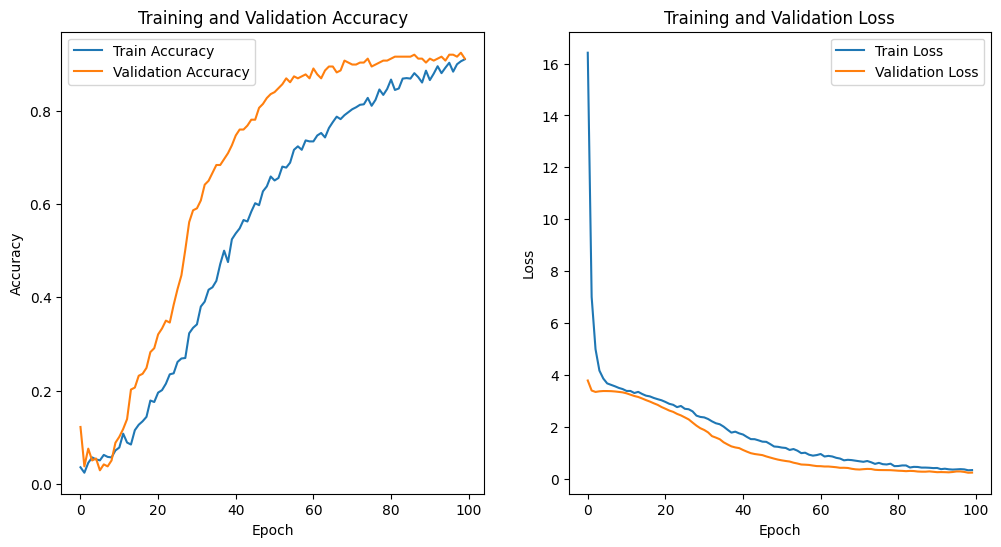

In [140]:
# evaluate the model
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {acc * 100:.2f}%")

# plot the training history
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()

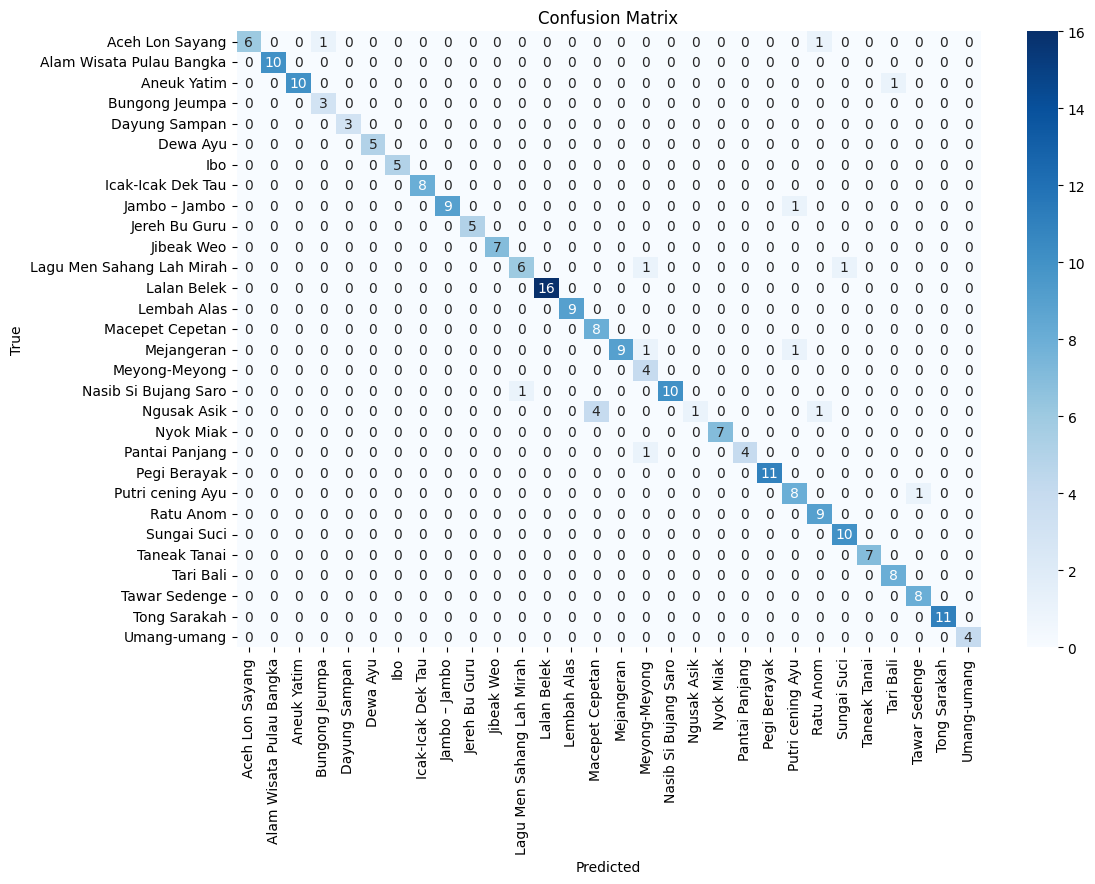

In [141]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [142]:
# Get predictions
y_pred = model.predict(X_test)

# Convert predictions to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate accuracy
test_accuracy = np.sum(y_pred_classes == y_test) / len(y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Test Accuracy: 91.14%


In [ ]:
from pydub import AudioSegment
from io import BytesIO

def convert_to_wav(audio_path):
    audio = AudioSegment.from_file(audio_path)
    wav_io = BytesIO()
    audio.export(wav_io, format="wav")
    wav_io.seek(0)
    return wav_io

# predict
def predict_song_genre(model, file_path):
    # Extract features
    wav = convert_to_wav(file_path)
    features = extract_features(wav)
    
    if features is not None:
        # Make prediction
        pred_features = features.reshape(1, -1)
        pred = model.predict(pred_features)
        pred_class = np.argmax(pred)
        
        # Get the predicted class label
        predicted_label = label_encoder.classes_[pred_class]
        
        # Get the predicted class probability
        pred_prob = pred[0][pred_class]
        
        return predicted_label, pred_prob
    else:
        return None

In [144]:
# Test the prediction function
file_path = 'datasets/test/men_sahang_lah_mirah_lirik_lagu_bangka_belitung.mp3'
predicted_genre, pred_prob = predict_song_genre(model, file_path)
print(f"Predicted Genre: {predicted_genre} with probability: {pred_prob:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Predicted Genre: Lagu Men Sahang Lah Mirah with probability: 1.00


In [151]:
# save model
model.save('model/my_model.h5')
# tf.keras.models.save_model(model, 'model/my_model.h5')

In [150]:
# load model
model = tf.keras.models.load_model('model/my_model.h5')